In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC

# Load the dataset from a CSV file
df = pd.read_csv('SMSSpamCollection.csv', sep='\t', header=None, names=['label', 'text'])

# Convert the text labels to numerical labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Create a TfidfVectorizer object to transform the text data into numerical vectors
vectorizer = TfidfVectorizer(stop_words='english')

# Use the vectorizer to transform the text data into numerical feature vectors
X = vectorizer.fit_transform(df['text'])

# Get the target labels
y = df['label']

# Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
}

# Use StratifiedKFold to split the data into 10 folds for cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create an SVM classifier with the RBF kernel
clf = SVC(kernel='rbf')

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(clf, param_grid, cv=skf, scoring='accuracy')
grid_search.fit(X, y)

# Print the best hyperparameters and the best accuracy score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best accuracy score: {grid_search.best_score_:.4f}")


Best hyperparameters: {'C': 10, 'gamma': 0.1}
Best accuracy score: 0.9835


In [3]:
# Import the required libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC

# Load the SMS data from a CSV file
df = pd.read_csv('SMSSpamCollection.csv', sep='\t', header=None, names=['label', 'text'])

# Convert the text labels to numerical labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Create a TfidfVectorizer object to transform the text data into numerical vectors
vectorizer = TfidfVectorizer(stop_words='english')

# Use the vectorizer to transform the text data into numerical feature vectors
X = vectorizer.fit_transform(df['text'])

# Get the target labels
y = df['label']

# Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
}

# Use StratifiedKFold to split the data into 10 folds for cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create an SVM classifier with the RBF kernel
clf = SVC(kernel='rbf')

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(clf, param_grid, cv=skf, scoring='accuracy')
grid_search.fit(X, y)

# Print the best hyperparameters and the best accuracy score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best accuracy score: {grid_search.best_score_:.4f}")


Best hyperparameters: {'C': 10, 'gamma': 0.1}
Best accuracy score: 0.9835


In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC

# Load the dataset
df = pd.read_csv('SMSSpamCollection.csv', sep='\t', header=None, names=['label', 'text'])

# Preprocess the dataset
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['label']

# Define the hyperparameters to tune
param_grid = {
    'C': [1, 10, 100],
    'kernel': ['rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

# Split the dataset into 10 samples and use GridSearchCV to find the best hyperparameters
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
clf = SVC()
grid_search = GridSearchCV(clf, param_grid, cv=skf, scoring='accuracy')
grid_search.fit(X, y)

# Print the best hyperparameters and the best accuracy score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best accuracy score: {grid_search.best_score_:.4f}")


Best hyperparameters: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'sigmoid'}
Best accuracy score: 0.9824


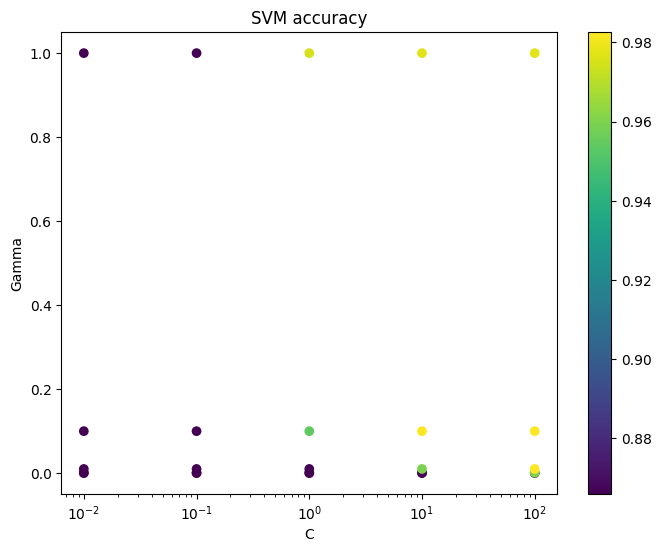

In [7]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('SMSSpamCollection.csv', sep='\t', header=None, names=['label', 'text'])

# Preprocess the dataset
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['label']

# Create a grid of C and gamma values
C_range = [0.01, 0.1, 1, 10, 100]
gamma_range = [0.0001, 0.001, 0.01, 0.1, 1]
C, gamma = np.meshgrid(C_range, gamma_range)

# Compute the accuracy for each combination of C and gamma values
accuracy = np.zeros_like(C)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for i in range(len(C_range)):
    for j in range(len(gamma_range)):
        clf = SVC(kernel='rbf', C=C_range[i], gamma=gamma_range[j])
        scores = []
        for train_idx, test_idx in skf.split(X, y):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            clf.fit(X_train, y_train)
            scores.append(clf.score(X_test, y_test))
        accuracy[j, i] = np.mean(scores)

# Plot the accuracy for each combination of C and gamma values
plt.figure(figsize=(8, 6))
plt.scatter(C, gamma, c=accuracy, cmap='viridis')
plt.colorbar()
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Gamma')
plt.title('SVM accuracy')
plt.show()
